# Fractal properties of particles in box

## Import libraries and folders

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import os
import sys
sys.path.append("../")

from scipy import stats
from scipy.linalg import norm

from config import results_folder, plots_folder

In [2]:
plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 4
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Fractal positions

In [415]:
N = 5000
radius = 0.004
radius_array = np.ones(N)*radius
positions = np.load(file=os.path.join(results_folder, f'fractalPositions_N_{N}_rad_{radius}.npy'))

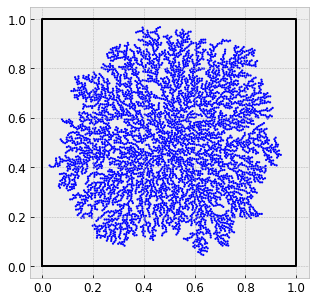

In [416]:
fig, ax = plt.subplots(figsize=(5, 5))
coll = matplotlib.collections.EllipseCollection(radius_array * 2, radius_array * 2,
                                                np.zeros_like(radius_array),
                                                offsets=positions, units='width',
                                                transOffset=ax.transData)
ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k')
ax.add_collection(coll)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
plt.show()

## Utility functions

In [417]:
def compute_Nx(epsilon_values, starting_position, particle_positions, radius):
    distance = norm(particle_positions - np.tile(starting_position, reps=(len(particle_positions), 1)), axis=1)
    number_of_points_inside_epsilon = np.zeros_like(epsilon_values)
    for counter, epsilon in enumerate(epsilon_values):
        boolean = distance <= epsilon
        number_of_points_inside_epsilon[counter] = np.sum(boolean)
    return number_of_points_inside_epsilon

def compute_C(particle_positions, radius):
    epsilon_val = np.linspace(radius, 1, 1000)
    number_of_points = np.zeros_like(epsilon_val)
    for i in range(len(particle_positions)):
        particle_pos = particle_positions[i, :]
        number_of_points += compute_Nx(epsilon_val, particle_pos, particle_positions, radius)
    number_of_points /= len(particle_positions)
    return epsilon_val, number_of_points

## Fractal dimension around center in box

In [418]:
epsilon_val_pd = np.linspace(radius, 1, 1000)
number_points = compute_Nx(epsilon_val_pd, [0.5, 0.5], positions, radius)

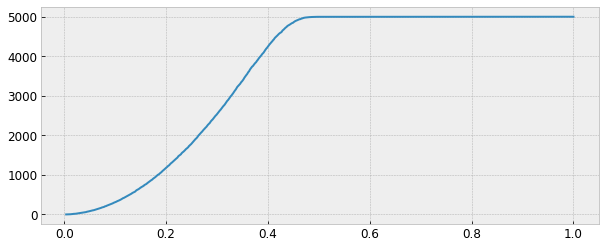

In [419]:
plt.plot(epsilon_val_pd, number_points)
plt.show()

In [420]:
log_eps_pd = np.log(epsilon_val_pd)
log_N = np.log(number_points)

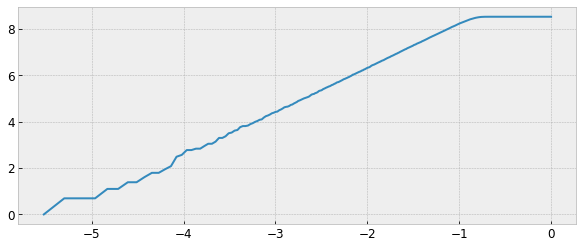

In [421]:
plt.plot(log_eps_pd, log_N)
#plt.loglog(epsilon_val, number_points)
plt.show()

In [422]:
log_eps_pd_lr = log_eps_pd[35:350]
log_N_lr = log_N[35:350]

In [423]:
pointwise_dimension, intercept_pd, r_value, p_value, std_err_pd = stats.linregress(log_eps_pd_lr, log_N_lr)

In [424]:
pointwise_dimension

1.9137881833764758

In [425]:
std_err_pd

0.0006968160360145005

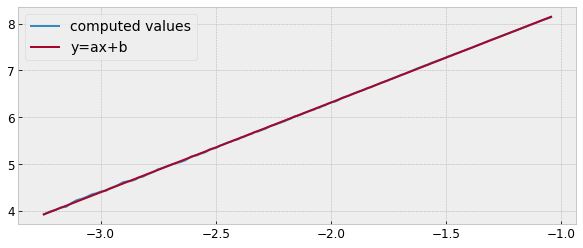

In [426]:
plt.plot(log_eps_pd_lr, log_N_lr, label='computed values')
plt.plot(log_eps_pd_lr, log_eps_pd_lr*pointwise_dimension+intercept_pd, label='y=ax+b')
plt.legend()
plt.show()

## Fractal dimension for all points

In [427]:
epsilon_val_cd = np.linspace(radius, 1, 1000)

In [428]:
epsilon_val_cd, number_of_points = compute_C(positions, radius)

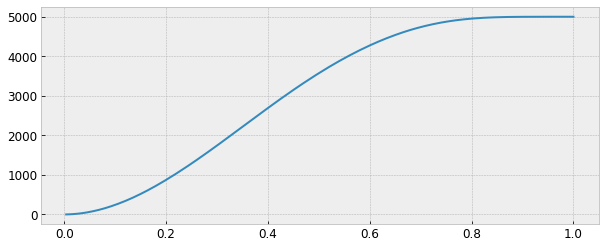

In [429]:
plt.plot(epsilon_val_cd, number_of_points)
#plt.plot(epsilon_val_cd, epsilon_val_cd**(1.914)*10000)
plt.show()

In [430]:
log_eps_cd = np.log(epsilon_val_cd)
log_C = np.log(number_of_points)

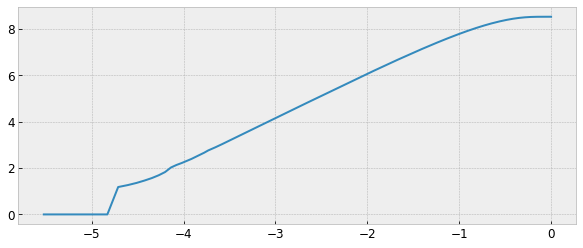

In [431]:
plt.plot(log_eps_cd, log_C)
plt.show()

In [465]:
log_eps_cd_lr = log_eps[50:300]
log_C_lr = log_C[50:300]

In [466]:
correlation_dimension, intercept_cd, r_value, p_value, std_err_cd = stats.linregress(log_eps_cd_lr, log_C_lr)

In [467]:
correlation_dimension

1.894695551048687

In [468]:
std_err

0.000732457333853684

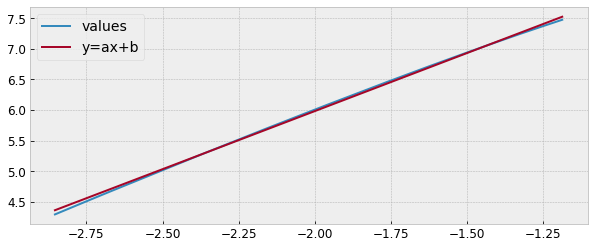

In [469]:
plt.plot(log_eps_cd_lr, log_C_lr, label='values')
plt.plot(log_eps_cd_lr, log_eps_cd_lr*correlation_dimension+intercept_cd, label='y=ax+b')
plt.legend()
plt.show()

## Plot

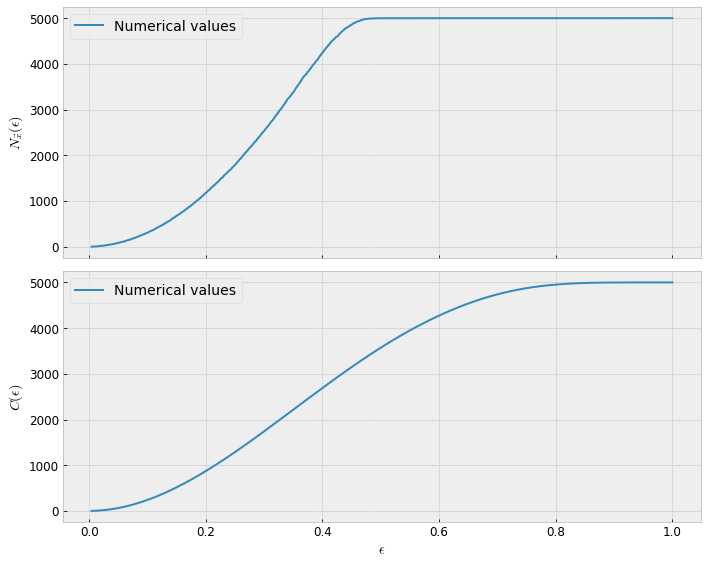

In [476]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))
axes[0].plot(epsilon_val_pd, number_points, label='Numerical values')
axes[1].plot(epsilon_val_cd, number_of_points, label='Numerical values')
axes[1].set_xlabel(r'$\epsilon$')
axes[0].set_ylabel(r'$N_\vec{x}(\epsilon)$')
axes[1].set_ylabel(r'$C(\epsilon)$')
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'number_of_points_vs_epsilon.pdf'))
plt.show()

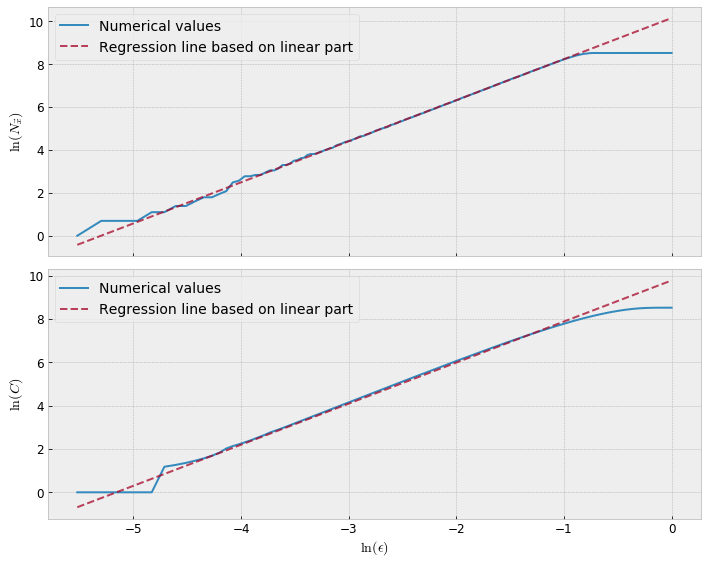

In [477]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))
axes[0].plot(log_eps_pd, log_N, label='Numerical values')
axes[0].plot(log_eps_pd, log_eps_pd*pointwise_dimension+intercept_pd, '--', alpha=0.75, label="Regression line based on linear part")
axes[1].plot(log_eps_cd, log_C, label="Numerical values")
axes[1].plot(log_eps_cd, log_eps_cd*correlation_dimension+intercept_cd, '--', alpha=0.75,label="Regression line based on linear part")
axes[1].set_xlabel(r'$\ln{(\epsilon)}$')
axes[0].set_ylabel(r'$\ln{(N_\vec{x})}$')
axes[1].set_ylabel(r'$\ln{(C)}$')
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'dimension_estimation.pdf'))
plt.show()